In [2]:
import pandas as pd
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import datetime

In [3]:
#https://drive.google.com/drive/folders/1LnZQNmVtp2ui29W5xgOIe-0cszMz88Bz?usp=sharing датасет
df = pd.read_csv('./data/SF_case_data.csv')

In [3]:
df[(df['event'] == 'purchase')&(df['utm_source'] == 'referal')].drop_duplicates('device_id')['utm_source'].value_counts()

referal    6362
Name: utm_source, dtype: int64

In [4]:
df[df['event'] == 'purchase'].drop_duplicates('device_id')['utm_source'].value_counts()

-                14786
vk_ads           11460
yandex-direct    10936
google_ads       10167
instagram_ads     9820
facebook_ads      7903
referal           5803
Name: utm_source, dtype: int64

In [4]:
vk = pd.DataFrame(df.date.value_counts())
vk.reset_index(level=0, inplace=True)
vk

,index,date
0,2020-01-10,89831
1,2020-03-06,63264
2,2020-01-11,58169
3,2020-02-14,54233
4,2020-01-14,53783
...,...,...
86,2020-01-06,19717
87,2020-01-04,19152
88,2020-03-31,19003
89,2020-01-08,18616


In [56]:
vk.iplot(kind  = 'scatter', x = 'index',y = 'date', mode = 'markers')

In [5]:
df['install_date'] = df['device_id'].map(df[df['event'] == 'app_install'].set_index('device_id')['date'])

In [6]:
installs = df[df['event'] == 'app_install']
df['install_date'] = df['device_id'].map(installs.set_index('device_id')['date'])
def new_column(date1,date2,value):
    if date1 == date2:
        return value
df['install_group'] = df.apply(lambda x: new_column(date1 = x['date'],date2 = x['install_date'],value = 'Установили в этот же день'),axis=1)
df['install_group'] = df['install_group'].fillna('Остальные')
df[df['event'] == 'app_start']['install_group'].value_counts()

Остальные                    594108
Установили в этот же день    154597
Name: install_group, dtype: int64

In [7]:
a = df[(df['date'] == '2020-02-14')&(df['event'] == 'app_start')].groupby(by='device_id').install_group.count().reset_index()['install_group'].sum()

In [8]:
b = df[(df['install_group'] == 'Остальные')&(df['date'] == '2020-02-14')&(df['event'] == 'app_start')].groupby(by='device_id').install_group.count().reset_index()['install_group'].sum()

In [9]:
b/a

0.710573600552868

In [26]:
df.pivot_table(index='date',columns='install_group',values='device_id',aggfunc='count').iplot()

In [22]:
df.pivot_table(index='date',columns='install_group',values='device_id')

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,install_group
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01-01,Установили в этот же день
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01-01,Установили в этот же день
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,NaN,Остальные
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01-01,Установили в этот же день
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01-01,Установили в этот же день
...,...,...,...,...,...,...,...,...,...,...
2747963,2020-03-31,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads,2020-03-28,Остальные
2747964,2020-03-31,register,NaN,ios,27301864,male,Moscow,-,2020-03-31,Установили в этот же день
2747965,2020-03-31,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads,2020-03-31,Установили в этот же день
2747966,2020-03-31,register,NaN,android,3010574,female,Saint-Petersburg,google_ads,2020-03-06,Остальные


In [16]:
hg = pd.DataFrame(df.groupby(by = 'date')['install_group'].value_counts())
hg.reset_index(level=0, inplace=True)

In [11]:
hg = hg.rename_axis(None)

In [12]:
hg.reset_index(level=0, inplace=True)

In [21]:
hg

,date,install_group
install_group,,
Установили в этот же день,2020-01-01,16623
Остальные,2020-01-01,3158
Установили в этот же день,2020-01-02,14707
Остальные,2020-01-02,6933
Установили в этот же день,2020-01-03,11188
...,...,...
Установили в этот же день,2020-03-29,5141
Остальные,2020-03-30,15723
Установили в этот же день,2020-03-30,4583


In [18]:
hg.iplot()

In [19]:
fig = px.scatter(hg, x="date", y="install_group", color="index",
    labels=dict(date="date", install_group="install_group", index="с динамикой открытий приложений для групп")
)
fig.show()

In [14]:
gh = df.pivot_table(index = 'date', columns = 'event',values = 'device_id', aggfunc = 'count')
gh = gh.rename_axis(None)
gh['Трафик от инсталов'] = gh['app_install']*100/(gh['app_install'] + gh['app_start'])
#gh['Трафик от инсталов2'] = gh['app_install']/gh['app_start']
gh.sort_values('Трафик от инсталов',ascending=False)

event,app_install,app_start,choose_item,purchase,register,search,tap_basket,Трафик от инсталов
2020-01-01,3579,4445,3246,907,1059,4243,2302,44.603689
2020-01-02,3144,5101,3747,1031,1145,4822,2650,38.132201
2020-01-10,13106,21429,15447,4218,4399,20347,10885,37.949906
2020-01-03,2402,5144,3708,1049,1073,4868,2617,31.831434
2020-01-14,5173,12937,9722,3510,2927,12292,7222,28.564329
...,...,...,...,...,...,...,...,...
2020-03-02,453,6468,4591,1154,302,6102,3198,6.545297
2020-03-14,443,6609,4680,1061,286,6268,3216,6.281906
2020-03-05,411,6170,4343,983,258,5830,2987,6.245251
2020-03-17,431,6542,4640,938,227,6180,3147,6.180984


In [32]:
gr1 = df[df['install_group'] == 'Остальные']
gr2 = df[df['install_group'] != 'Остальные']

In [33]:
stat = gr1.merge(gr2, how = 'left', on = 'date')

MemoryError: Unable to allocate 131. GiB for an array with shape (17649500784,) and data type int64

In [ ]:
stat['Доля трафика с инсталлов, %'] = stat['users_y']/(stat['users_y'] +stat['users_x'])
stat['gr'] = 'Трафик с инсталлов'
stat.sort_values('Доля трафика с инсталлов, %', ascending = True).head(3)

In [43]:
df

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,install_date,install_group
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01-01,Установили в этот же день
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01-01,Установили в этот же день
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,NaN,Остальные
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01-01,Установили в этот же день
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01-01,Установили в этот же день
...,...,...,...,...,...,...,...,...,...,...
2747963,2020-03-31,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads,2020-03-28,Остальные
2747964,2020-03-31,register,NaN,ios,27301864,male,Moscow,-,2020-03-31,Установили в этот же день
2747965,2020-03-31,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads,2020-03-31,Установили в этот же день
2747966,2020-03-31,register,NaN,android,3010574,female,Saint-Petersburg,google_ads,2020-03-06,Остальные


In [73]:
df[df['event'] == 'app_install'].groupby(by = 'utm_source')['device_id'].count().reset_index().sort_values(by = 'device_id', ascending = False)

,utm_source,device_id
0,-,32460
6,yandex-direct,29368
2,google_ads,26286
5,vk_ads,23189
3,instagram_ads,20096
1,facebook_ads,13916
4,referal,9282


In [75]:
df[df['event'] == 'app_start'].groupby(by = 'utm_source')['device_id'].count().reset_index().sort_values(by = 'device_id', ascending = False)

,utm_source,device_id
0,-,167806
5,vk_ads,112999
3,instagram_ads,104582
6,yandex-direct,103841
2,google_ads,100626
1,facebook_ads,93967
4,referal,64884


In [78]:
df[df['event'] == 'app_start'].sort_values(by = 'date').drop_duplicates('device_id').groupby(by = 'utm_source')['device_id'].count().reset_index().sort_values(by = 'device_id', ascending = False)

,utm_source,device_id
0,-,41456
6,yandex-direct,34441
2,google_ads,31437
5,vk_ads,27905
3,instagram_ads,24818
1,facebook_ads,18844
4,referal,11983


In [67]:
df1 = df[df['event'] == 'app_install'].groupby(['date','utm_source']).size().reset_index(name = 'users')
pd.pivot_table(df1, values='users', index='utm_source', aggfunc='sum').sort_values('users',ascending = False)

,users
utm_source,
-,32460
yandex-direct,29368
google_ads,26286
vk_ads,23189
instagram_ads,20096
facebook_ads,13916
referal,9282


In [ ]:
df = data[data['event'] == 'app_start'].sort_values('date').drop_duplicates('device_id').groupby(['date','utm_source']).size().reset_index(name = 'users')
pd.pivot_table(df, values='users', index='utm_source', aggfunc='sum').sort_values('users',ascending = False)

In [12]:
register = df[df['event'] == 'register']
df['register_date'] = df['device_id'].map(register.set_index('device_id')['date'])
def new_column(date1,date2,value):
    if str(date1) > str(date2):
        return value
df['register_group'] = df.apply(lambda x: new_column(date1 = x['date'],date2 = x['register_date'],value = 'Уже зарегистрирован'),axis=1)
df['register_group'] = df['register_group'].fillna('Не регистрировался')
df[df['event'] == 'app_start']['register_group'].value_counts()

Уже зарегистрирован    441486
Не регистрировался     307219
Name: register_group, dtype: int64

In [13]:
df[df['event'] == 'tap_basket'].groupby('register_group').count()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,first_registration,register_date
register_group,,,,,,,,,,
Не регистрировался,160409,160409,0,160409,160409,160409,160409,160409,105031,105031
Уже зарегистрирован,217256,217256,0,217256,217256,217256,217256,217256,217256,217256


In [23]:
reg = df[df['register_group'] == 'Уже зарегистрирован']
reg = pd.crosstab(reg.register_group, reg.event, values=reg.device_id, aggfunc='nunique')
reg['1 step'] = reg['search']*100/reg['app_start']
reg['2 step'] = reg['choose_item']*100/reg['search']
reg['3 step'] = reg['tap_basket']*100/reg['choose_item']
reg['5 step'] = reg['purchase']*100/reg['tap_basket']
reg

event,app_start,choose_item,purchase,search,tap_basket,1 step,2 step,3 step,5 step
register_group,,,,,,,,,
Уже зарегистрирован,40991,37926,24880,40482,34517,98.758264,93.686083,91.011443,72.080424


In [25]:
reg = df[df['register_group'] == 'Уже зарегистрирован']
reg = pd.crosstab(reg.utm_source, reg.event, values=reg.device_id, aggfunc='nunique')
reg['1 step'] = reg['search']*100/reg['app_start']
reg['2 step'] = reg['choose_item']*100/reg['search']
reg['3 step'] = reg['tap_basket']*100/reg['choose_item']
reg['5 step'] = reg['purchase']*100/reg['tap_basket']
reg

event,app_start,choose_item,purchase,search,tap_basket,1 step,2 step,3 step,5 step
utm_source,,,,,,,,,
-,9482,8728,5492,9355,7850,98.660620,93.297702,89.940422,69.961783
facebook_ads,5606,5154,3333,5527,4694,98.590796,93.251312,91.074893,71.005539
google_ads,5399,4948,3121,5335,4438,98.814595,92.746017,89.692805,70.324470
instagram_ads,5686,5288,3548,5618,4842,98.804080,94.126023,91.565809,73.275506
referal,3647,3417,2382,3610,3155,98.985468,94.653740,92.332455,75.499208
vk_ads,6011,5636,3950,5958,5196,99.118283,94.595502,92.193045,76.020015
yandex-direct,5396,4928,3099,5304,4464,98.295033,92.911011,90.584416,69.422043


In [24]:
reg = df[df['register_group'] == 'Не регистрировался']
reg = pd.crosstab(reg.register_group, reg.event, values=reg.device_id, aggfunc='nunique')
reg['1 step'] = reg['search']*100/reg['app_start']
reg['2 step'] = reg['choose_item']*100/reg['search']
reg['3 step'] = reg['tap_basket']*100/reg['choose_item']
reg['4 step'] = reg['register']*100/reg['tap_basket']
reg['5 step'] = reg['purchase']*100/reg['register']
reg

event,app_install,app_start,choose_item,purchase,register,search,tap_basket,1 step,2 step,3 step,4 step,5 step
register_group,,,,,,,,,,,,
Не регистрировался,154597,190884,155691,67753,78310,184488,125414,96.649274,84.390855,80.553147,62.441195,86.518963


In [26]:
reg = df[df['register_group'] == 'Не регистрировался']
reg = pd.crosstab(reg.utm_source, reg.event, values=reg.device_id, aggfunc='nunique')
reg['1 step'] = reg['search']*100/reg['app_start']
reg['2 step'] = reg['choose_item']*100/reg['search']
reg['3 step'] = reg['tap_basket']*100/reg['choose_item']
reg['4 step'] = reg['register']*100/reg['tap_basket']
reg['5 step'] = reg['purchase']*100/reg['register']
reg

event,app_install,app_start,choose_item,purchase,register,search,tap_basket,1 step,2 step,3 step,4 step,5 step
utm_source,,,,,,,,,,,,
-,32460,48670,38026,14073,16527,46742,29223,96.038627,81.352959,76.850050,56.554769,85.151570
facebook_ads,13916,23780,18713,7506,8672,22822,14592,95.971405,81.995443,77.977876,59.429825,86.554428
google_ads,26286,35778,27416,9777,11405,34217,20765,95.636984,80.123915,75.740444,54.924151,85.725559
instagram_ads,20096,29237,22858,9394,10750,28017,17881,95.827205,81.586180,78.226442,60.119680,87.386047
referal,9282,14866,11880,5503,6193,14316,9518,96.300283,82.984074,80.117845,65.066190,88.858389
vk_ads,23189,32353,25422,10919,12421,31010,20014,95.848917,81.980006,78.727087,62.061557,87.907576
yandex-direct,29368,38578,29591,10581,12342,36933,22417,95.735912,80.120759,75.756142,55.056430,85.731648


In [5]:
first_registration = df[df['event'] == 'register'].sort_values('date').drop_duplicates('device_id')
#first_registration['finally_registered'] = 1
df['first_registration'] = df['device_id'].map(first_registration.set_index('device_id')['date'])
#df['finally_registered'] = df['device_id'].map(first_registration.set_index('device_id')['finally_registered'])
already_reg = df[df['first_registration'] < df['date']]
already_reg['registered'] = 1
requires_reg1 = df[(df['first_registration'].isna() == True)]
requires_reg1['registered'] = 0
requires_reg2 =  df[df['first_registration'] >= df['date']]
requires_reg2['registered'] = 0
data = pd.concat([already_reg,requires_reg1,requires_reg2])
data[data['event'] == 'tap_basket'].groupby('registered').count()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,first_registration
registered,,,,,,,,,
0,160409,160409,0,160409,160409,160409,160409,160409,105031
1,217256,217256,0,217256,217256,217256,217256,217256,217256


In [6]:
reg = data[data['registered'] == 1]
funnel_reg = pd.crosstab(reg.utm_source, reg.event, values=reg.device_id, aggfunc=pd.Series.nunique)
funnel_reg['1 step'] = funnel_reg['search']*100/funnel_reg['app_start']
funnel_reg['2 step'] = funnel_reg['choose_item']*100/funnel_reg['search']
funnel_reg['3 step'] = funnel_reg['tap_basket']*100/funnel_reg['choose_item']
funnel_reg['5 step'] = funnel_reg['purchase']*100/funnel_reg['tap_basket']
funnel_reg

event,app_start,choose_item,purchase,search,tap_basket,1 step,2 step,3 step,5 step
utm_source,,,,,,,,,
-,9482,8728,5492,9355,7850,98.660620,93.297702,89.940422,69.961783
facebook_ads,5606,5154,3333,5527,4694,98.590796,93.251312,91.074893,71.005539
google_ads,5399,4948,3121,5335,4438,98.814595,92.746017,89.692805,70.324470
instagram_ads,5686,5288,3548,5618,4842,98.804080,94.126023,91.565809,73.275506
referal,3647,3417,2382,3610,3155,98.985468,94.653740,92.332455,75.499208
vk_ads,6011,5636,3950,5958,5196,99.118283,94.595502,92.193045,76.020015
yandex-direct,5396,4928,3099,5304,4464,98.295033,92.911011,90.584416,69.422043


In [7]:
not_reg = data[data['registered'] == 0]
funnel_not_reg = pd.crosstab(not_reg.utm_source, not_reg.event, values=not_reg.device_id, aggfunc=pd.Series.nunique)
funnel_not_reg['1 step'] = funnel_not_reg['search']*100/funnel_not_reg['app_start']
funnel_not_reg['2 step'] = funnel_not_reg['choose_item']*100/funnel_not_reg['search']
funnel_not_reg['3 step'] = funnel_not_reg['tap_basket']*100/funnel_not_reg['choose_item']
funnel_not_reg['4 step'] = funnel_not_reg['register']*100/funnel_not_reg['tap_basket']
funnel_not_reg['5 step'] = funnel_not_reg['purchase']*100/funnel_not_reg['register']
funnel_not_reg

event,app_install,app_start,choose_item,purchase,register,search,tap_basket,1 step,2 step,3 step,4 step,5 step
utm_source,,,,,,,,,,,,
-,32460,48670,38026,14073,16527,46742,29223,96.038627,81.352959,76.850050,56.554769,85.151570
facebook_ads,13916,23780,18713,7506,8672,22822,14592,95.971405,81.995443,77.977876,59.429825,86.554428
google_ads,26286,35778,27416,9777,11405,34217,20765,95.636984,80.123915,75.740444,54.924151,85.725559
instagram_ads,20096,29237,22858,9394,10750,28017,17881,95.827205,81.586180,78.226442,60.119680,87.386047
referal,9282,14866,11880,5503,6193,14316,9518,96.300283,82.984074,80.117845,65.066190,88.858389
vk_ads,23189,32353,25422,10919,12421,31010,20014,95.848917,81.980006,78.727087,62.061557,87.907576
yandex-direct,29368,38578,29591,10581,12342,36933,22417,95.735912,80.120759,75.756142,55.056430,85.731648


In [52]:
df[df['event'] == 'purchase'].sort_values('date').drop_duplicates('device_id')['utm_source'].value_counts().reset_index(name = 'users')

#first_purchase['first_purchase'] = 1
#df['first_purchase'] = df['device_id'].map(first_purchase.set_index('device_id')['first_purchase'])
#df['first_purchase'].fillna(0,inplace=True)

,index,users
0,-,14786
1,vk_ads,11460
2,yandex-direct,10936
3,google_ads,10167
4,instagram_ads,9820
5,facebook_ads,7903
6,referal,5803


In [44]:
reg = df
reg = pd.crosstab(reg.utm_source, reg.event, values=reg.device_id, aggfunc='nunique')
reg['1'] = reg['purchase']*100/reg['app_start']
#reg['1 step'] = reg['search']*100/reg['app_start']
#reg['2 step'] = reg['choose_item']*100/reg['search']
#reg['3 step'] = reg['tap_basket']*100/reg['choose_item']
#reg['4 step'] = reg['register']*100/reg['tap_basket']
#reg['5 step'] = reg['purchase']*100/reg['register']
reg

event,app_install,app_start,choose_item,purchase,register,search,tap_basket,1
utm_source,,,,,,,,
-,32460,52268,41276,16598,16527,50282,32076,31.755567
facebook_ads,13916,25957,20687,9017,8672,24963,16362,34.738221
google_ads,26286,38092,29495,11339,11405,36495,22588,29.767405
instagram_ads,20096,31045,24503,10762,10750,29805,19339,34.665808
referal,9282,15924,12849,6362,6193,15358,10395,39.952273
vk_ads,23189,34079,27001,12364,12421,32713,21440,36.280407
yandex-direct,29368,40707,31501,12028,12342,39018,24110,29.547744


In [45]:
first_opens = df[df['event'] == 'app_start'].sort_values('date').drop_duplicates('device_id').groupby(['utm_source']).size().reset_index(name = 'users')
first_purchase = df[df['event'] == 'purchase'].sort_values('date').drop_duplicates('device_id').groupby(['utm_source']).size().reset_index(name = 'users')

stat = first_opens.merge(first_purchase, how = 'left', on = 'utm_source')
stat['CR to first purchase'] = stat['users_y']/stat['users_x']
stat

,utm_source,users_x,users_y,CR to first purchase
0,-,41456,14786,0.356667
1,facebook_ads,18844,7903,0.419391
2,google_ads,31437,10167,0.323409
3,instagram_ads,24818,9820,0.395681
4,referal,11983,5803,0.484269
5,vk_ads,27905,11460,0.410679
6,yandex-direct,34441,10936,0.317529


In [50]:
first_opens = df[df['event'] == 'app_start'].sort_values('date').drop_duplicates('device_id').groupby('utm_source').size().reset_index(name = 'users')
first_opens

,utm_source,users
0,-,41456
1,facebook_ads,18844
2,google_ads,31437
3,instagram_ads,24818
4,referal,11983
5,vk_ads,27905
6,yandex-direct,34441


In [55]:
first_purchase = df[df['event'] == 'purchase'].sort_values('date').drop_duplicates('device_id').groupby(['utm_source']).size().reset_index(name = 'users')
first_purchase

,utm_source,users
0,-,14786
1,facebook_ads,7903
2,google_ads,10167
3,instagram_ads,9820
4,referal,5803
5,vk_ads,11460
6,yandex-direct,10936


In [12]:
first_purchase_mean = df[df['event'] == 'purchase'].sort_values('date').drop_duplicates('device_id').pivot_table(values = 'purchase_sum',index = 'utm_source',aggfunc = ['mean','median'])

In [21]:
 first_purchase_mean.sort_values(by=('median','purchase_sum'),ascending=False)

,mean,median
,purchase_sum,purchase_sum
utm_source,,
-,698.211078,398.5
referal,696.420128,395.5
instagram_ads,716.201018,393.5
vk_ads,716.480192,393.0
yandex-direct,725.740719,392.5
google_ads,700.920134,390.5
facebook_ads,692.090029,389.0


In [24]:
df[df['event'] == 'purchase'].sort_values('date').drop_duplicates('device_id').groupby(['utm_source'])['purchase_sum'].agg(['mean','median']).sort_values('mean', ascending = False)

,mean,median
utm_source,,
yandex-direct,725.740719,392.5
vk_ads,716.480192,393.0
instagram_ads,716.201018,393.5
google_ads,700.920134,390.5
-,698.211078,398.5
referal,696.420128,395.5
facebook_ads,692.090029,389.0


In [25]:
df[df['event'] == 'purchase']

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads
...,...,...,...,...,...,...,...,...
2747963,2020-03-31,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads
2747964,2020-03-31,register,NaN,ios,27301864,male,Moscow,-
2747965,2020-03-31,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads
2747966,2020-03-31,register,NaN,android,3010574,female,Saint-Petersburg,google_ads


In [101]:
pd.options.display.float_format = '{:.2f}'.format

In [90]:
hjj = len(df[(df['event'] == 'purchase')&(df['utm_source'] == 'referal')].sort_values('date').drop_duplicates('device_id'))*100*2

In [136]:
len(df[(df['event'] == 'purchase')&(df['utm_source'] == 'referal')].sort_values('date').drop_duplicates('device_id'))*100*2

1272400

In [146]:
df[(df['event'] == 'purchase')&(df['utm_source'] == 'referal')].drop_duplicates('device_id')['utm_source'].value_counts()

referal    6362
Name: utm_source, dtype: int64

In [144]:
df[df['event'] == 'purchase'].drop_duplicates('device_id')['utm_source'].value_counts()

-                14786
vk_ads           11460
yandex-direct    10936
google_ads       10167
instagram_ads     9820
facebook_ads      7903
referal           5803
Name: utm_source, dtype: int64

In [143]:
df[df['event'] == 'purchase'].drop_duplicates('device_id')['utm_source'].value_counts()

-                14786
vk_ads           11460
yandex-direct    10936
google_ads       10167
instagram_ads     9820
facebook_ads      7903
referal           5803
Name: utm_source, dtype: int64

In [45]:
advertising_costs.rename(columns = )

,1,2
0,yandex-direct,10491707
1,google_ads,10534878
2,facebook_ads,8590498
3,instagram_ads,8561626
4,vk_ads,9553531
5,referal,1272400
6,-,0


In [86]:
kkl = {'utm_source':['yandex-direct','google_ads','facebook_ads','instagram_ads','vk_ads','referal','-','test'],'advertising_costs':[10491707,10534878,8590498,8561626,9553531,hjj,1,1]}
advertising_costs = pd.DataFrame(kkl)

In [107]:
advertising_costs_purchase = df[df['purchase_sum'].notna()].groupby(by='utm_source')['purchase_sum'].sum().reset_index()
advertising_costs_purchase.loc[7] = ['test',1]
advertising_costs_purchase.reset_index()
advertising_costs_purchase = advertising_costs_purchase.merge(advertising_costs, left_on='utm_source', right_on='utm_source')

In [108]:
advertising_costs_purchase.reset_index()

,index,utm_source,purchase_sum,advertising_costs
0,0,-,21449749.50,1
1,1,facebook_ads,12249901.00,8590498
2,2,google_ads,12868276.00,10534878
3,3,instagram_ads,14546969.00,8561626
4,4,referal,8837044.50,1272400
5,5,vk_ads,16389652.50,9553531
6,6,yandex-direct,13915368.00,10491707
7,7,test,1.00,1


In [111]:
advertising_costs_purchase['advertising_costs'] = advertising_costs_purchase['advertising_costs'].astype('float64')

In [117]:
advertising_costs_purchase['ROMI'] = (advertising_costs_purchase['purchase_sum'] - advertising_costs_purchase['advertising_costs'])/advertising_costs['advertising_costs']

In [118]:
advertising_costs_purchase

,utm_source,purchase_sum,advertising_costs,ROMI
0,-,21449749.50,1.00,2.04
1,facebook_ads,12249901.00,8590498.00,0.35
2,google_ads,12868276.00,10534878.00,0.27
3,instagram_ads,14546969.00,8561626.00,0.70
4,referal,8837044.50,1272400.00,0.79
5,vk_ads,16389652.50,9553531.00,5.37
6,yandex-direct,13915368.00,10491707.00,3423661.00
7,test,1.00,1.00,0.00


In [115]:
(advertising_costs_purchase.loc[6][1]-advertising_costs_purchase.loc[6][2])/advertising_costs_purchase.loc[6][2]

0.3263206835646478

In [119]:
(advertising_costs_purchase.loc[5][1]-advertising_costs_purchase.loc[5][2])/advertising_costs_purchase.loc[5][2]

0.7155596710786828

In [125]:
def new_column(date1,date2):
    return (date1-date2)/date2
advertising_costs_purchase['ROMI'] = advertising_costs_purchase.apply(lambda x: new_column(date1 = x['purchase_sum'],date2 = x['advertising_costs']),axis=1)


In [133]:
advertising_costs_purchase['ROMI'] = advertising_costs_purchase.apply(lambda x: (x['purchase_sum']-x['advertising_costs'])/x['advertising_costs'],axis=1)

In [134]:

advertising_costs_purchase['ROMI'] = advertising_costs_purchase['ROMI'].map(lambda x:x*100)
advertising_costs_purchase['ROMI'] = advertising_costs_purchase['ROMI'].map('{:,.2f}%'.format)

In [135]:
advertising_costs_purchase

,utm_source,purchase_sum,advertising_costs,ROMI
0,-,21449749.50,1.00,"2,144,974,850.00%"
1,facebook_ads,12249901.00,8590498.00,42.60%
2,google_ads,12868276.00,10534878.00,22.15%
3,instagram_ads,14546969.00,8561626.00,69.91%
4,referal,8837044.50,1272400.00,594.52%
5,vk_ads,16389652.50,9553531.00,71.56%
6,yandex-direct,13915368.00,10491707.00,32.63%
7,test,1.00,1.00,0.00%


In [11]:
register = df[df['event'] == 'app_start'].sort_values('date').drop_duplicates('device_id')
df['first_entrance'] = df['device_id'].map(register.set_index('device_id')['date'])

In [7]:
df['install_date'] = df['device_id'].map(df[df['event'] == 'app_start'].set_index('device_id')['date'])

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [22]:
df['first_entrance_cohort'].mean()

Timestamp('2020-01-18 18:34:12.919536640')

In [26]:
df['first_entrance_cohort'].mean()

Timestamp('2020-01-18 18:34:12.919536640')

In [159]:
entrances = df[df['event'] == 'app_start'].sort_values('date').drop_duplicates('device_id')
df['first_entrance'] = df['device_id'].map(entrances.set_index('device_id')['date'])
df['first_entrance'] = pd.to_datetime(df['first_entrance'], format = '%Y-%m-%d')
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['first_entrance_cohort'] = df['first_entrance'].apply(lambda x: x + datetime.timedelta(days=-x.weekday(), weeks=0))

In [25]:
df['first_entrance_cohort'] = df['first_entrance'].apply(lambda x: x + datetime.timedelta(days=-x.weekday()))

In [12]:
df.iloc[1][8]

Timestamp('2020-01-01 00:00:00')

In [18]:
df.iloc[2747967][8]-df.iloc[2747967][8].weekday()

-1

In [19]:
datetime.timedelta(days=-df.iloc[1][8].weekday())

datetime.timedelta(days=-2)

In [21]:
df.iloc[1][8] + datetime.timedelta(days=-df.iloc[1][8].weekday())

Timestamp('2019-12-30 00:00:00')

In [ ]:
from datetime import timedelta

end_date = (date+timedelta(days=4)).strftime("%Y-%m-%d")
# ...
date = date+timedelta(days=3)

In [160]:
df['n_week'] = df['date'] - df['first_entrance_cohort']

In [161]:
df['n_week'] = df['n_week'].apply(lambda x: x.days // 7 )

In [162]:
df['first_entrance_cohort'] = df['first_entrance_cohort'].apply(lambda x: str(x)[:10])

In [163]:
piwot = pd.pivot_table(df, index = 'first_entrance_cohort',columns = 'n_week',values ='device_id',aggfunc = 'nunique')

In [164]:
piwot

n_week,0,1,2,3,4,5,6,7,8,9,10,11,12,13
first_entrance_cohort,,,,,,,,,,,,,,
2019-12-30,15705.0,7551.0,6792.0,6338.0,5794.0,5295.0,5452.0,5387.0,4853.0,4983.0,4541.0,4355.0,4498.0,2227.0
2020-01-06,31315.0,8228.0,6040.0,4958.0,4222.0,4540.0,4553.0,3507.0,4136.0,3246.0,2944.0,3047.0,1143.0,NaN
2020-01-13,30505.0,5068.0,3861.0,3122.0,3610.0,3175.0,2303.0,2894.0,1983.0,1818.0,1923.0,661.0,NaN,NaN
2020-01-20,12319.0,1863.0,1443.0,1706.0,1543.0,1079.0,1388.0,918.0,791.0,873.0,278.0,NaN,NaN,NaN
2020-01-27,13119.0,2037.0,1971.0,1669.0,1227.0,1397.0,1003.0,875.0,909.0,318.0,NaN,NaN,NaN,NaN
2020-02-03,10967.0,1993.0,1599.0,1126.0,1266.0,933.0,804.0,839.0,273.0,NaN,NaN,NaN,NaN,NaN
2020-02-10,16015.0,2560.0,1487.0,2083.0,1227.0,1019.0,1031.0,350.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-17,11974.0,1511.0,1606.0,995.0,845.0,884.0,281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24,5172.0,933.0,625.0,499.0,509.0,173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# piwot = piwot.apply(lambda x: x*100/piwot[0])
# piwot

n_week,0,1,2,3,4,5,6,7,8,9,10,11,12,13
first_entrance_cohort,,,,,,,,,,,,,,
2019-12-30,100.0,48.080229,43.247373,40.356574,36.892709,33.715377,34.715059,34.301178,30.900987,31.728749,28.914358,27.730022,28.640560,14.180197
2020-01-06,100.0,26.274948,19.287881,15.832668,13.482357,14.497844,14.539358,11.199106,13.207728,10.365639,9.401245,9.730161,3.650008,NaN
2020-01-13,100.0,16.613670,12.656941,10.234388,11.834126,10.408130,7.549582,9.486969,6.500574,5.959679,6.303885,2.166858,NaN,NaN
2020-01-20,100.0,15.122981,11.713613,13.848527,12.525367,8.758828,11.267148,7.451904,6.420976,7.086614,2.256677,NaN,NaN,NaN
2020-01-27,100.0,15.527098,15.024011,12.722006,9.352847,10.648677,7.645400,6.669716,6.928882,2.423965,NaN,NaN,NaN,NaN
2020-02-03,100.0,18.172700,14.580104,10.267165,11.543722,8.507340,7.331084,7.650223,2.489286,NaN,NaN,NaN,NaN,NaN
2020-02-10,100.0,15.985014,9.285045,13.006556,7.661567,6.362785,6.437715,2.185451,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-17,100.0,12.619008,13.412394,8.309671,7.056957,7.382662,2.346751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24,100.0,18.039443,12.084300,9.648105,9.841454,3.344934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


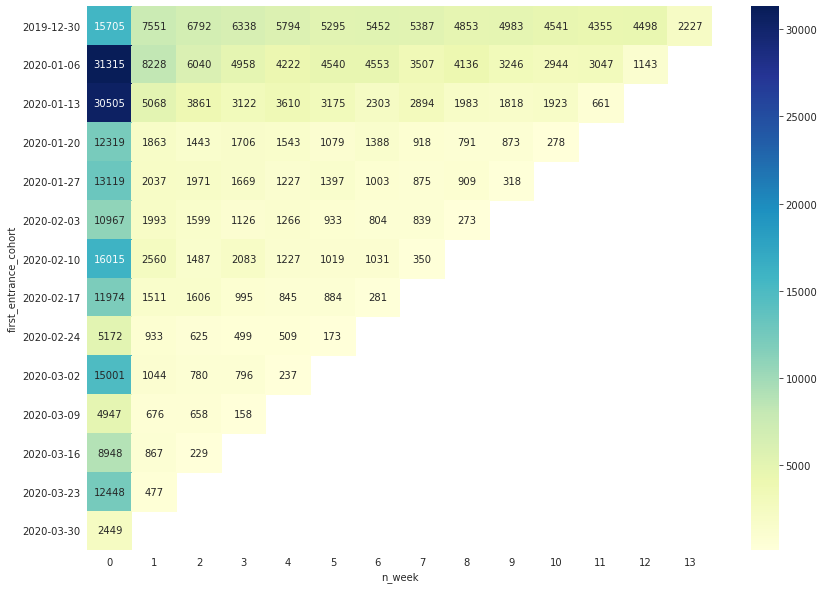

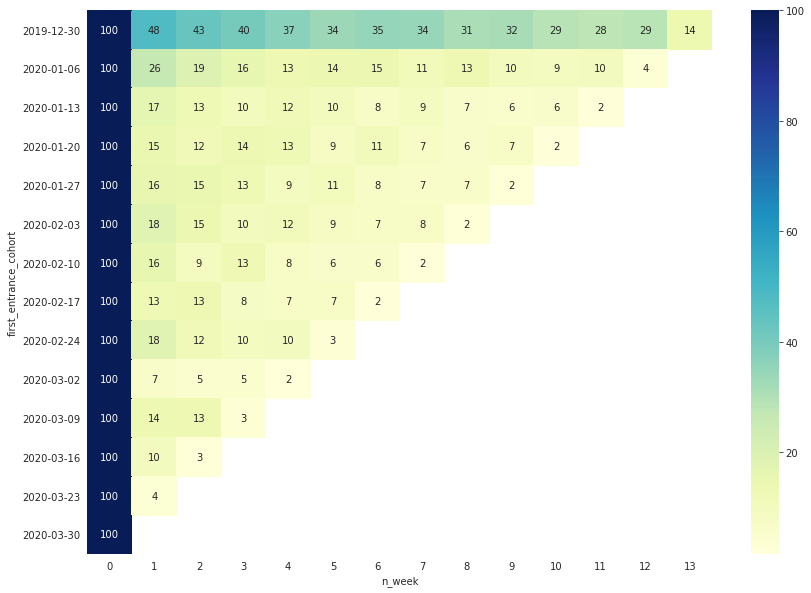

In [43]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(piwot, annot=True, fmt=".0f", cmap="YlGnBu");
    
piwot = piwot.apply(lambda x: x*100/piwot[0])
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(piwot, annot=True, fmt=".0f", cmap="YlGnBu");

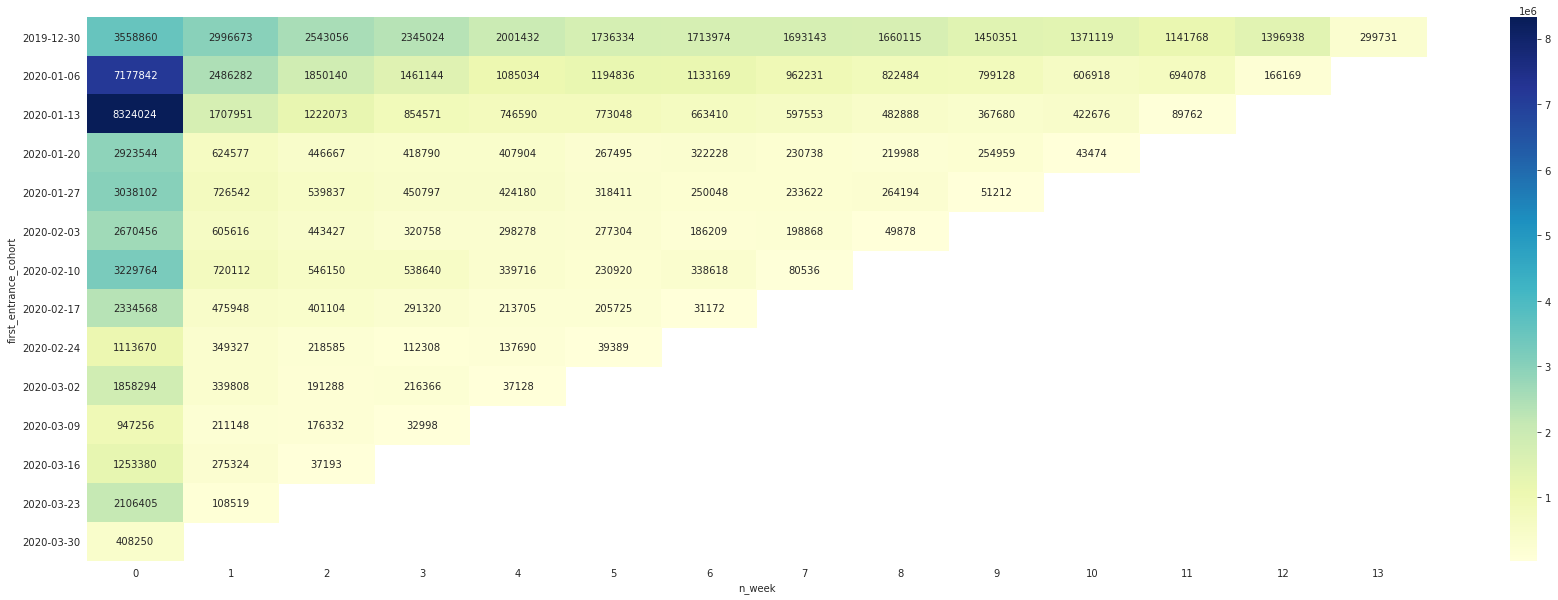

In [52]:
piwot = pd.pivot_table(df, index = 'first_entrance_cohort',columns = 'n_week',values ='purchase_sum',aggfunc = 'sum')
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30, 10))
    ax = sns.heatmap(piwot, annot=True, fmt=".0f", cmap="YlGnBu");

In [59]:
df = df[df['event'] == 'purchase']
# df.groupby(by='first_entrance_cohort')['purchase_sum'].agg(['sum','count'])
df.groupby(by='first_entrance_cohort')['purchase_sum'].sum().reset_index(name = 'LTV').sort_values('LTV', ascending = False)

,first_entrance_cohort,LTV
0,2019-12-30,25908519.0
1,2020-01-06,20439455.5
2,2020-01-13,16252225.0
4,2020-01-27,6296945.5
3,2020-01-20,6160362.0
6,2020-02-10,6024457.5
5,2020-02-03,5050794.0
7,2020-02-17,3953543.0
9,2020-03-02,2642884.0
12,2020-03-23,2214924.0


In [ ]:
df = df[df['event'] == 'purchase']
df.groupby('first_purchase_cohort')['purchase_sum'].sum().reset_index(name = 'LTV').sort_values('LTV', ascending = False)

In [74]:
purchases = data[data['event'] == 'purchase'].sort_values('date').drop_duplicates('device_id')
data['first_purchase'] = data['device_id'].map(purchases.set_index('device_id')['date'])
data['first_purchase'] = pd.to_datetime(data['first_purchase'], format = '%Y-%m-%d')
df = data[-data['first_purchase'].isna()]
df['first_purchase_cohort'] = df['first_purchase'].apply(lambda x: x + datetime.timedelta(days=-x.weekday(), weeks=0))
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['n_week'] = df['date'] - df['first_purchase_cohort']
df['n_week'] = df['n_week'].apply(lambda x: x.days // 7 )
df['first_purchase_cohort'] = df['first_purchase_cohort'].apply(lambda x: str(x)[:10])

df = df[df['event'] == 'purchase']
df.groupby('first_purchase_cohort')['purchase_sum'].sum().reset_index(name = 'LTV').sort_values('LTV', ascending = False)

NameError: name 'data' is not defined

In [151]:
purchases = df[df['event'] == 'purchase'].sort_values('date').drop_duplicates('device_id')
df['first_purchase'] = df['device_id'].map(purchases.set_index('device_id')['date'])
df['first_purchase'] = pd.to_datetime(df['first_purchase'], format = '%Y-%m-%d')
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [152]:
df = df[-df['first_purchase'].isna()]

In [153]:
df['first_purchase_cohort'] = df['first_purchase'].apply(lambda x: x + datetime.timedelta(days=-x.weekday(), weeks=0))

In [154]:
df['n_week'] = df['date'] - df['first_purchase_cohort']
df['n_week'] = df['n_week'].apply(lambda x: x.days // 7 )
df['first_purchase_cohort'] = df['first_purchase_cohort'].apply(lambda x: str(x)[:10])

In [155]:
df = df[df['event'] == 'purchase']
# df.groupby(by='first_entrance_cohort')['purchase_sum'].agg(['sum','count'])
df.groupby('first_purchase_cohort')['purchase_sum'].sum().reset_index(name = 'LTV').sort_values('LTV', ascending = False)

,first_purchase_cohort,LTV
1,2020-01-06,19787838.0
2,2020-01-13,18852452.0
0,2019-12-30,12320177.5
3,2020-01-20,9018049.5
4,2020-01-27,7432634.0
6,2020-02-10,6766314.0
5,2020-02-03,6305237.0
7,2020-02-17,5398837.5
9,2020-03-02,3629773.0
8,2020-02-24,3067633.5


In [156]:
df1 = df[(df['event'] == 'purchase')&(df['n_week'] == 0)]
df1.groupby('first_purchase_cohort')['purchase_sum'].median().reset_index(name = 'median').sort_values('median', ascending = False)

,first_purchase_cohort,median
10,2020-03-09,400.50
5,2020-02-03,398.00
3,2020-01-20,397.50
6,2020-02-10,397.00
1,2020-01-06,396.00
12,2020-03-23,395.75
0,2019-12-30,395.00
4,2020-01-27,394.75
9,2020-03-02,393.50
7,2020-02-17,392.00


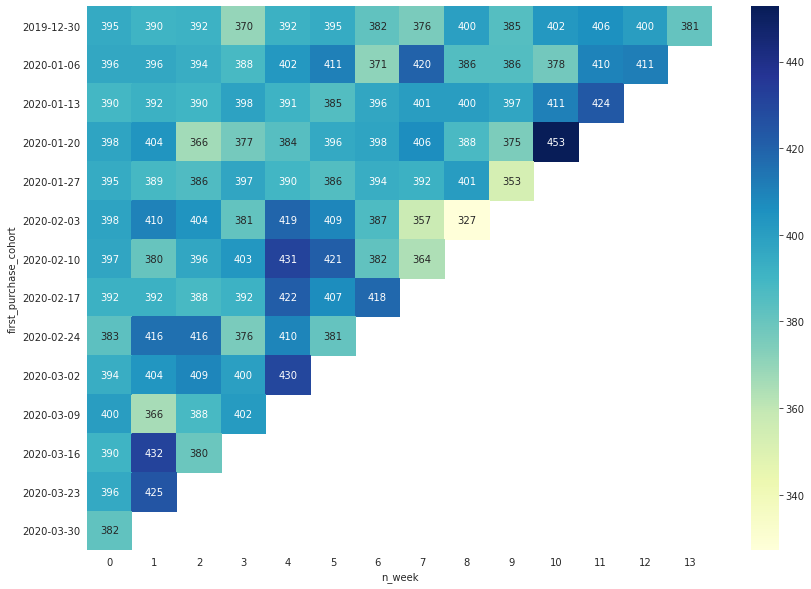

In [157]:
viz = df.pivot_table(
                        index='first_purchase_cohort', 
                        columns='n_week', 
                        values='purchase_sum', 
                        aggfunc='median')

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(viz, annot=True, fmt=".0f", cmap="YlGnBu");

In [119]:
df1 = df[(df['event'] == 'purchase')&(df['n_week'] == 1)]
df1.groupby('utm_source')['purchase_sum'].median().reset_index(name = 'median').sort_values('median', ascending = False)

,utm_source,median
3,instagram_ads,414.00
0,-,400.50
5,vk_ads,398.00
1,facebook_ads,396.00
6,yandex-direct,390.50
2,google_ads,385.00
4,referal,376.25


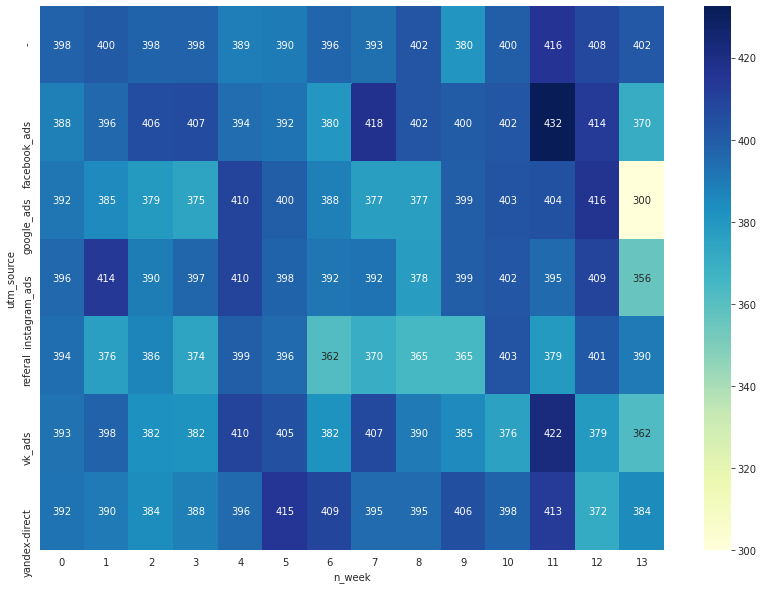

In [120]:
viz = df.pivot_table(
                        index='utm_source', 
                        columns='n_week', 
                        values='purchase_sum', 
                        aggfunc='median')
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(viz, annot=True, fmt=".0f", cmap="YlGnBu");

In [125]:
register = df[df['event'] == 'register'].sort_values('date').drop_duplicates('device_id')
df['register'] = df['device_id'].map(register.set_index('device_id')['date'])
df['register'] = pd.to_datetime(df['register'], format = '%Y-%m-%d')
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df = df[-df['register'].isna()]
df['register_cohort'] = df['register'].apply(lambda x: x + datetime.timedelta(days=-x.weekday(), weeks=0))
df['n_week'] = df['date'] - df['register_cohort']
df['n_week'] = df['n_week'].apply(lambda x: x.days // 7 )
df['register_cohort'] = df['register_cohort'].apply(lambda x: str(x)[:10])


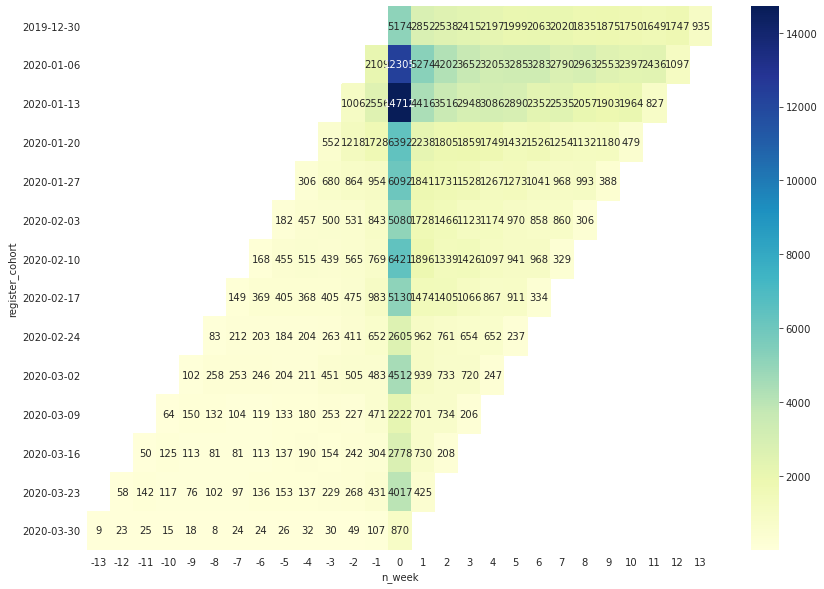

In [126]:
viz = df.pivot_table(
                        index='register_cohort', 
                        columns='n_week', 
                        values='device_id', 
                        aggfunc=pd.Series.nunique)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(viz, annot=True, fmt=".0f", cmap="YlGnBu");

In [49]:
tds = df[df['publication'] == 'Towards Data Science'].\
         set_index('published_date')

tds[['claps', 'fans', 'title']].iplot(
    y='claps', mode='lines+markers', secondary_y = 'fans',
    secondary_y_title='Fans', xTitle='Date', yTitle='Claps',
    text='title', title='Fans and Claps over Time')

KeyError: 'publication'

## PROJEKT-1 
#### fktr00 Алексей Маляренко fktr00@mail.ru

# ОТЧЁТ

In [2]:
import pandas as pd
import datetime
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs, init_notebook_mode,plot, iplot
import plotly.express as px
import plotly.graph_objects as go
init_notebook_mode(connected = True)
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt

## 1 График с событиями по дням и ответ на вопросы: 
## В каком месте маркетинг работает недостаточно хорошо? За счёт чего можно расти?

In [25]:
df = pd.read_csv('SF_case_data.csv')
df = df.groupby('date')['event'].count()
df.iplot(title='График с событиями по дням')

Тут мы видим точные всплески по праздникам. Значит если дать рекламу прямо за два дня перед ними можно сильно увеличить выручку. А также дать купон на скидку во время праздника, для того чтоб после пика какой-то процент людей совершили больше покупок.

## 2 График с распределением трафика (открытие приложения) по группам «Установили в тот же день» и «Остальные».

In [76]:
def new_c(date1,date2,v):
    if date1 == date2:
        return v
    
df = pd.read_csv('SF_case_data.csv')
df['ins_date'] = df['device_id'].map(df[df['event'] == 'app_install'].set_index('device_id')['date'])
df['ins_group'] = df.apply(lambda x: new_c(date1 = x['date'],date2 = x['ins_date'],v = 'Установили в этот же день'),axis=1)
df['ins_group'] = df['ins_group'].fillna('Остальные')
df = df[df['event']=='app_start']
df = df.pivot_table(index='date',columns='ins_group',values='device_id',aggfunc='count')

In [77]:
dfp1.iplot(color=['#ffcdd2','#A2D5F2'],mode='lines+markers',title='График с распределением трафика (открытие приложения) по группам')

Тут мы видим выделяющаяся всплеск во второе воскресение после нового года. Надо обязательно обговорить и распланировать мероприятия по привлечению на каждое первое воскресение после новогодних праздников, там можно привлечь в разы больше новых установок и ROMI резко вырастет (подробней ниже). Также при выдаче купона на вторую покупку, количество активированных клиентов сильно поднимется.

Вообще любые выходные недалеко от праздников интересны для маркетологов и требуют обсуждений и распределения скидок с купонами.

## 3 График с динамикой установок приложения по каналам привлечения и ответ на вопрос: 
## С каких платных каналов приходит больше и меньше всего пользователей?

In [11]:
df = pd.read_csv('SF_case_data.csv')
app_inst_e = df[df['event'] == 'app_install']
app_inst_e = app_inst_e.pivot_table(values='event',index='date',columns='utm_source',aggfunc='count')
first_purchase = df[df['event'] == 'app_install'].sort_values('date').drop_duplicates('device_id').groupby(['utm_source']).size().reset_index(name = 'users')
px.line(app_inst_e).show()
display(first_purchase.T.sort_values('users',axis=1,ascending=False))

,0,6,2,5,3,1,4
utm_source,-,yandex-direct,google_ads,vk_ads,instagram_ads,facebook_ads,referal
users,32460,29368,26286,23189,20096,13916,9282


В первом квартале Яндекс.Директ принёс нам больше чем другие источники, реферальня программа оказалась самой ефективной из всех по ROMI но привлекла менише всего новых клиентов. 

## 4 Анализ: на каком этапе воронки отваливается б'ольшая часть клиентов 
### (отдельно для зарегистрированных и для незарегистрированных пользователей)

## Предложения по оптимизации

In [28]:
df = pd.read_csv('SF_case_data.csv')

def new_co(date1,date2,v):
    if str(date1) > str(date2):
        return v
    
register = df[df['event'] == 'register']
df['r_date'] = df['device_id'].map(register.set_index('device_id')['date'])
df['register_group'] = df.apply(lambda x: new_co(date1 = x['date'],date2 = x['r_date'],v = 'Уже зарегистрирован'),axis=1)
df['register_group'] = df['register_group'].fillna('Не регистрировался')

In [32]:
# Блок из череды текста и таблиц
display(df[df['event'] == 'app_start']['register_group'].value_counts())
reg = df[df['register_group'] == 'Уже зарегистрирован']
reg = pd.crosstab(reg['utm_source'], reg['event'], values=reg['device_id'], aggfunc='nunique')
reg['1 Поиск'] = reg['search']*100/reg['app_start']
reg['2 Выбор товара'] = reg['choose_item']*100/reg['search']
reg['3 Переход в корзину'] = reg['tap_basket']*100/reg['choose_item']
reg['5 Покупка'] = reg['purchase']*100/reg['tap_basket']
print('Уже зарегистрированные в разрезе источников привлечения')
display(reg)
regn = df[df['register_group'] == 'Не регистрировался']
regn = pd.crosstab(regn['utm_source'], regn['event'], values=regn['device_id'], aggfunc='nunique')
regn['1 Поиск'] = regn['search']*100/regn['app_start']
regn['2 Выбор товара'] = regn['choose_item']*100/regn['search']
regn['3 Переход в корзину'] = regn['tap_basket']*100/regn['choose_item']
regn['4 Регистрация'] = regn['register']*100/regn['tap_basket']
regn['5 Покупка'] = regn['purchase']*100/regn['register']
print('Не зарегистрированные в разрезе источников привлечения')
display(regn)
reg = df[df['register_group'] == 'Уже зарегистрирован']
reg = pd.crosstab(reg['register_group'], reg['event'], values=reg['device_id'], aggfunc='nunique')
reg['1 Поиск'] = reg['search']*100/reg['app_start']
reg['2 Выбор товара'] = reg['choose_item']*100/reg['search']
reg['3 Переход в корзину'] = reg['tap_basket']*100/reg['choose_item']
reg['5 Покупка'] = reg['purchase']*100/reg['tap_basket']
print('Уже зарегистрированные в простом только по шагам варианте')
display(reg)
regn = df[df['register_group'] == 'Не регистрировался']
regn = pd.crosstab(regn['register_group'], regn['event'], values=regn['device_id'], aggfunc='nunique')
regn['1 Поиск'] = regn['search']*100/regn['app_start']
regn['2 Выбор товара'] = regn['choose_item']*100/regn['search']
regn['3 Переход в корзину'] = regn['tap_basket']*100/regn['choose_item']
regn['4 Регистрация'] = regn['register']*100/regn['tap_basket']
regn['5 Покупка'] = regn['purchase']*100/regn['register']
print('Не зарегистрированные, только по шагам ')
display(regn)

Уже зарегистрирован    441486
Не регистрировался     307219
Name: register_group, dtype: int64

Уже зарегистрированные в разрезе источников привлечения


event,app_start,choose_item,purchase,search,tap_basket,1 Поиск,2 Выбор товара,3 Переход в корзину,5 Покупка
utm_source,,,,,,,,,
-,9482,8728,5492,9355,7850,98.660620,93.297702,89.940422,69.961783
facebook_ads,5606,5154,3333,5527,4694,98.590796,93.251312,91.074893,71.005539
google_ads,5399,4948,3121,5335,4438,98.814595,92.746017,89.692805,70.324470
instagram_ads,5686,5288,3548,5618,4842,98.804080,94.126023,91.565809,73.275506
referal,3647,3417,2382,3610,3155,98.985468,94.653740,92.332455,75.499208
vk_ads,6011,5636,3950,5958,5196,99.118283,94.595502,92.193045,76.020015
yandex-direct,5396,4928,3099,5304,4464,98.295033,92.911011,90.584416,69.422043


Не зарегистрированные в разрезе источников привлечения


event,app_install,app_start,choose_item,purchase,register,search,tap_basket,1 Поиск,2 Выбор товара,3 Переход в корзину,4 Регистрация,5 Покупка
utm_source,,,,,,,,,,,,
-,32460,48670,38026,14073,16527,46742,29223,96.038627,81.352959,76.850050,56.554769,85.151570
facebook_ads,13916,23780,18713,7506,8672,22822,14592,95.971405,81.995443,77.977876,59.429825,86.554428
google_ads,26286,35778,27416,9777,11405,34217,20765,95.636984,80.123915,75.740444,54.924151,85.725559
instagram_ads,20096,29237,22858,9394,10750,28017,17881,95.827205,81.586180,78.226442,60.119680,87.386047
referal,9282,14866,11880,5503,6193,14316,9518,96.300283,82.984074,80.117845,65.066190,88.858389
vk_ads,23189,32353,25422,10919,12421,31010,20014,95.848917,81.980006,78.727087,62.061557,87.907576
yandex-direct,29368,38578,29591,10581,12342,36933,22417,95.735912,80.120759,75.756142,55.056430,85.731648


Уже зарегистрированные в простом только по шагам варианте


event,app_start,choose_item,purchase,search,tap_basket,1 Поиск,2 Выбор товара,3 Переход в корзину,5 Покупка
register_group,,,,,,,,,
Уже зарегистрирован,40991,37926,24880,40482,34517,98.758264,93.686083,91.011443,72.080424


Не зарегистрированные, только по шагам 


event,app_install,app_start,choose_item,purchase,register,search,tap_basket,1 Поиск,2 Выбор товара,3 Переход в корзину,4 Регистрация,5 Покупка
register_group,,,,,,,,,,,,
Не регистрировался,154597,190884,155691,67753,78310,184488,125414,96.649274,84.390855,80.553147,62.441195,86.518963


Для уже зарегистрированных пользователей, провал который существенно влияет на конверсию, это покупка после перехода в корзину, что просто требует комплекс мер по реактивации брошенных корзин пользователя.
А с не зарегистрированными всё сложней, ведь без регистрации нельзя купить товар, и решить этот вопрос можно только максимальным упрощением формы регистрации, или более органичного её вплетение в покупку. В идеале так чтоб пользователь сначала купил, а уже для получения зарегистрировался.

## 5 Выбор лучшего и худшего каналов по конверсии в первую покупку.

In [12]:
df = pd.read_csv('SF_case_data.csv')
f_opens = df[df['event'] == 'app_start'].sort_values('date').drop_duplicates('device_id').groupby(['utm_source']).size().reset_index(name = 'users')
f_purchase = df[df['event'] == 'purchase'].sort_values('date').drop_duplicates('device_id').groupby(['utm_source']).size().reset_index(name = 'users')
cp_merge = f_opens.merge(f_purchase, how = 'left', on = 'utm_source')
cp_merge.columns = ['utm_source', 'f_opens','f_purchase']
cp_merge['CR_в_первую_покупку'] = cp_merge['f_purchase']/cp_merge['f_opens']
cp_merge.sort_values('CR_в_первую_покупку',ascending=False)

,utm_source,f_opens,f_purchase,CR_в_первую_покупку
4,referal,11983,5803,0.484269
1,facebook_ads,18844,7903,0.419391
5,vk_ads,27905,11460,0.410679
3,instagram_ads,24818,9820,0.395681
0,-,41456,14786,0.356667
2,google_ads,31437,10167,0.323409
6,yandex-direct,34441,10936,0.317529


Лучший здесь оказалась Реферальная программа, видимо денежная мотивация сильно помогла и люди почти с 50% процентным шансом покупают через этот источник. Далее идёт на одной строчке две классические соц сети Фейсбук и Вконтакте, следует присмотреться к ним.

Яндекс директ стал самым плохим каналом.

## 6 Расчёт ROMI для всех каналов.

In [21]:
df = pd.read_csv('SF_case_data.csv')
referal_cost = len(df[(df['event'] == 'purchase')&(df['utm_source'] == 'referal')].sort_values('date').drop_duplicates('device_id'))*100*2
# важно утчнить что тут два фильтра
advertising_costs = {'utm_source':['yandex-direct','google_ads','facebook_ads','instagram_ads','vk_ads','referal','-'],
       'advertising_costs':[10491707,10534878,8590498,8561626,9553531,referal_cost,1]}
advertising_costs_purchase = df[df['purchase_sum'].notna()].groupby(by='utm_source')['purchase_sum'].sum().reset_index()
advertising_costs_purchase = advertising_costs_purchase.merge(pd.DataFrame(advertising_costs), left_on='utm_source', right_on='utm_source')
def new_col(date1,date2):
    return (date1-date2)/date2
advertising_costs_purchase['ROMI'] = advertising_costs_purchase.apply(lambda x: new_col(date1 = x['purchase_sum'],date2 = x['advertising_costs']),axis=1)
advertising_costs_purchase['ROMI'] = advertising_costs_purchase['ROMI'].map(lambda x:x*100)
advertising_costs_purchase['ROMI'] = advertising_costs_purchase['ROMI'].map('{:,.2f}%'.format)
advertising_costs_purchase['ROMI'][0]='-'
advertising_costs_purchase['advertising_costs'][0]='-'

In [22]:
advertising_costs_purchase.sort_values('purchase_sum',ascending=False)

,utm_source,purchase_sum,advertising_costs,ROMI
0,-,21449749.5,-,-
5,vk_ads,16389652.5,9553531,71.56%
3,instagram_ads,14546969.0,8561626,69.91%
6,yandex-direct,13915368.0,10491707,32.63%
2,google_ads,12868276.0,10534878,22.15%
1,facebook_ads,12249901.0,8590498,42.60%
4,referal,8837044.5,1272400,594.52%


Если отсортировать по прибыли, то в самом низу будет Реферальная программа, но при этом у неё просто невероятные показатели, надо увеличивать бюджет этого источника. Из-за его недооцененности компания не дополучает прибыль.

## 7 Таблица когорт (в абс. и %) по неделе первого посещения, выбор самой большой и самой активной когорт.

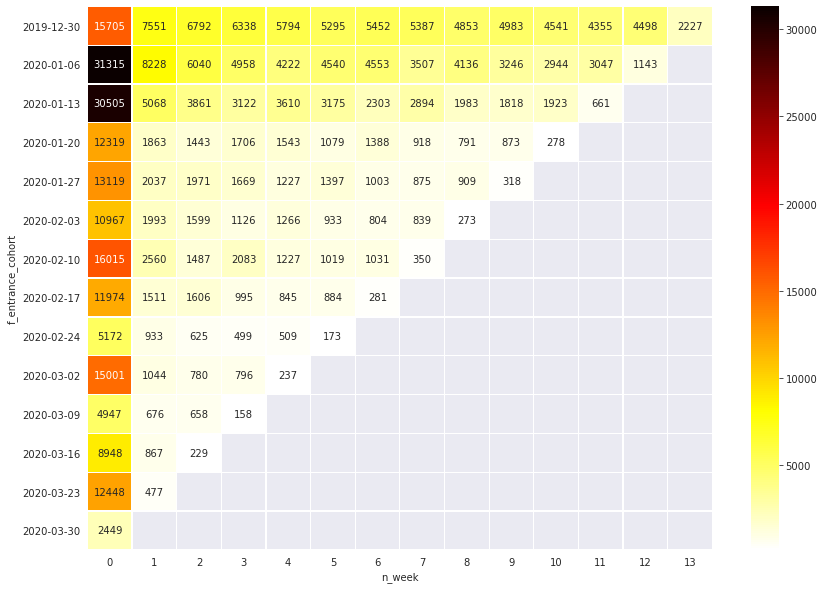

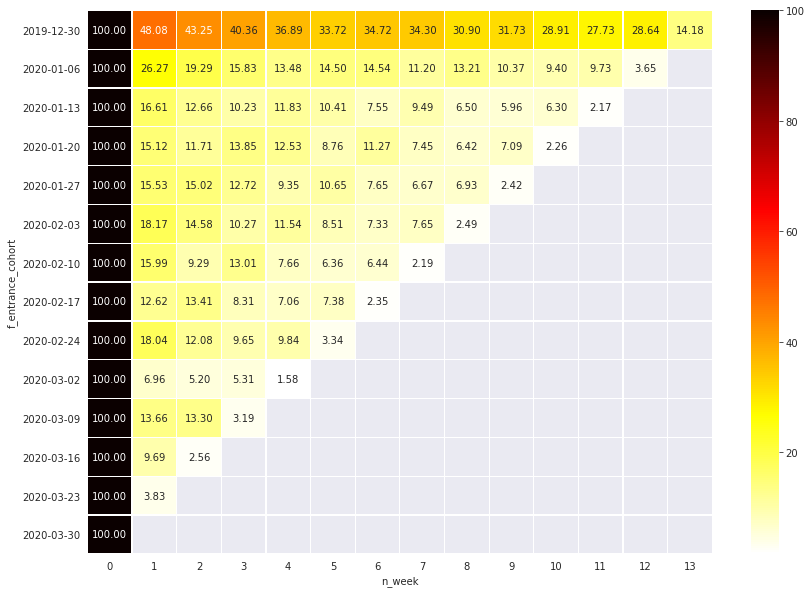

In [24]:
df = pd.read_csv('SF_case_data.csv')
entrances = df[df['event'] == 'app_start'].sort_values('date').drop_duplicates('device_id')
df['f_entrance'] = df['device_id'].map(entrances.set_index('device_id')['date'])
df['f_entrance'] = pd.to_datetime(df['f_entrance'], format = '%Y-%m-%d')
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['f_entrance_cohort'] = df['f_entrance'].apply(lambda x: x + datetime.timedelta(days=-x.weekday()))
df['n_week'] = df['date'] - df['f_entrance_cohort']
df['n_week'] = df['n_week'].apply(lambda x: x.days // 7 )
df['f_entrance_cohort'] = df['f_entrance_cohort'].apply(lambda x: str(x)[:10])

piwot = pd.pivot_table(df, index = 'f_entrance_cohort',columns = 'n_week',values ='device_id',aggfunc = 'nunique')
with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(piwot, annot=True, fmt=".0f", cmap="hot_r",linewidths=.2);
    plt.ylabel('Когорты по неделям')
    plt.xlabel('Неделя когорты')
    
piwot = piwot.apply(lambda x: x*100/piwot[0])
with sns.axes_style("darkgrid"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(piwot, annot=True, fmt=".2f", cmap="hot_r",linewidths=.2); # linewidths=.5
    plt.ylabel('Когорты по неделям')
    plt.xlabel('Неделя когорты')

2019-12-30 Была самая активная когорта.
2020-01-06 Самая многочисленная.

## 8 Таблица когорт (в абс. и %) по неделе первой покупки, выбор самой активной когорты и анализ динамики активности.

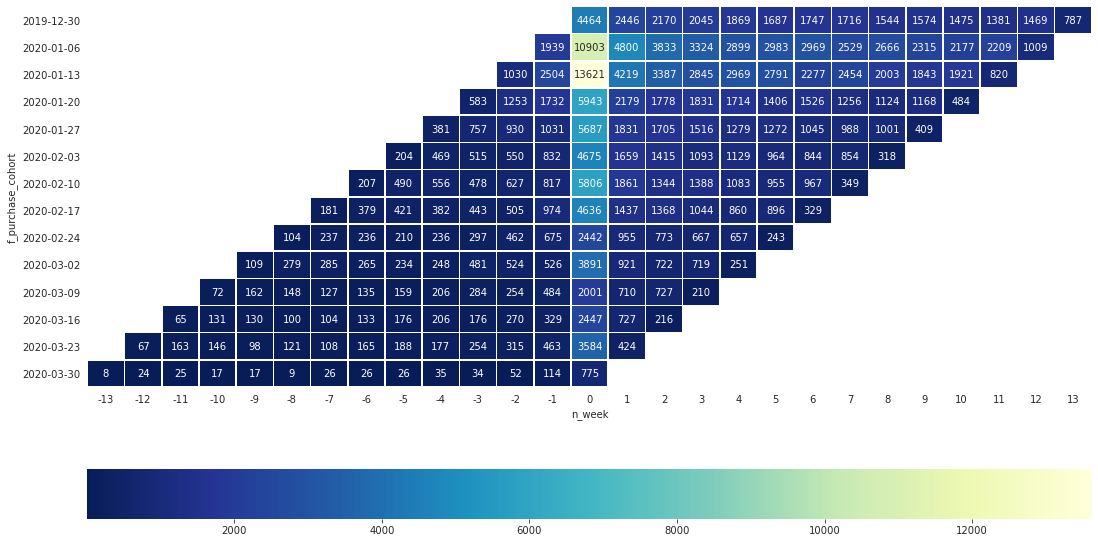

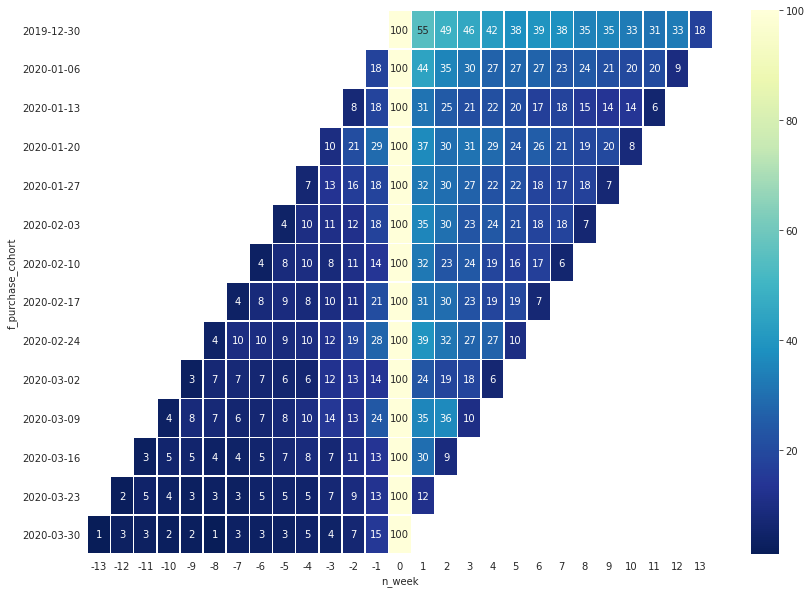

In [33]:
df = pd.read_csv('SF_case_data.csv')
purchases = df[df['event'] == 'purchase'].sort_values('date').drop_duplicates('device_id')
df['f_purchase'] = df['device_id'].map(purchases.set_index('device_id')['date'])
df['f_purchase'] = pd.to_datetime(df['f_purchase'], format = '%Y-%m-%d')
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df = df[-df['f_purchase'].isna()]
df['f_purchase_cohort'] = df['f_purchase'].apply(lambda x: x + datetime.timedelta(days=-x.weekday(), weeks=0))
df['n_week'] = df['date'] - df['f_purchase_cohort']
df['n_week'] = df['n_week'].apply(lambda x: x.days // 7 )
df['f_purchase_cohort'] = df['f_purchase_cohort'].apply(lambda x: str(x)[:10])
viz = df.pivot_table(index='f_purchase_cohort', columns='n_week', values='device_id', aggfunc='nunique')

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 10))
    ax = sns.heatmap(viz, annot=True, fmt=".0f", cmap="YlGnBu_r",linewidths=.5,cbar_kws={"orientation": "horizontal"});
    plt.ylabel('Когорты по неделям')
    plt.xlabel('Неделя когорты')
    
viz = viz.apply(lambda x: x*100/viz[0])
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(viz, annot=True, fmt=".0f", cmap="YlGnBu_r",linewidths=.5);
    plt.ylabel('Когорты по неделям')
    plt.xlabel('Неделя когорты')

2019-12-30 и тут оказалась самой активной.

## 9 Расчёт медианного/среднего чека по когортам (недели первой покупки) в каждую неделю с момента первой покупки.

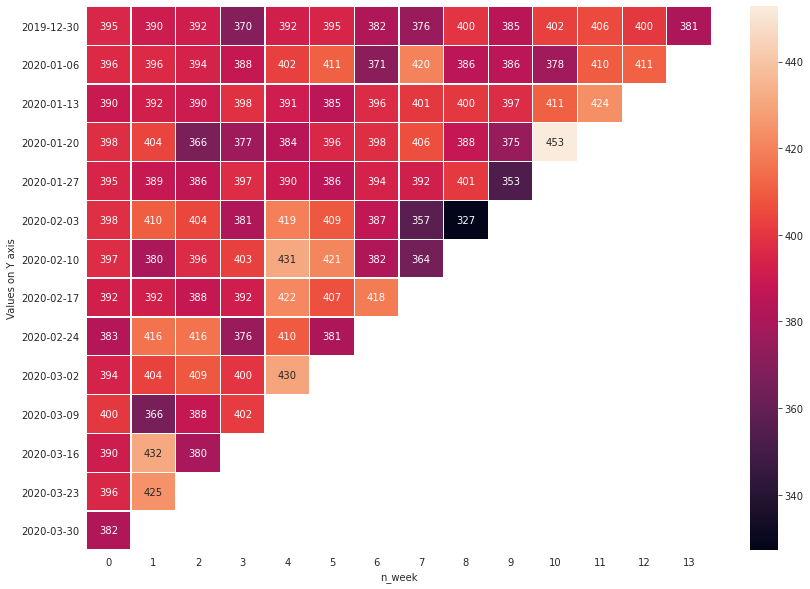

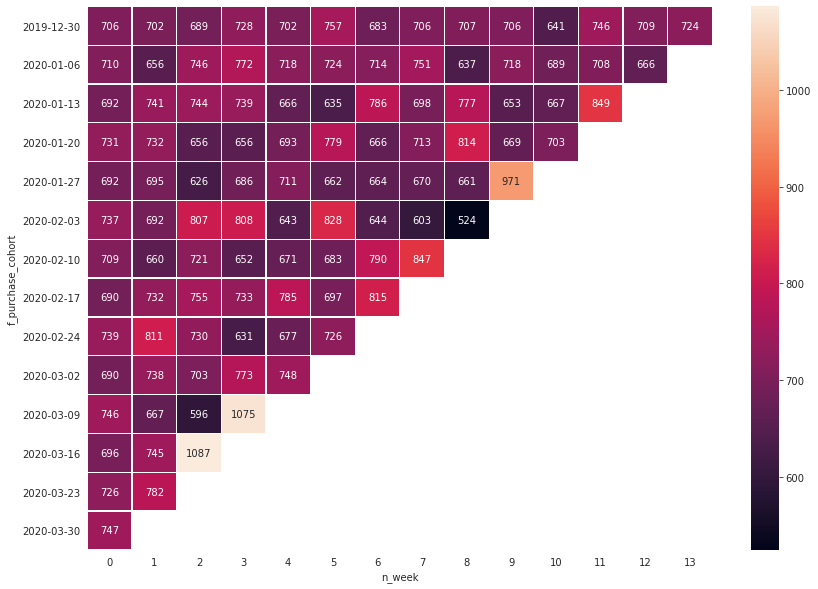

In [35]:
viz = df.pivot_table(index='f_purchase_cohort', columns='n_week', values='purchase_sum', aggfunc='median')

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(viz, annot=True, fmt=".0f",linewidths=.2);
    plt.ylabel('Когорты по неделям')
    plt.xlabel('Неделя когорты')
viz = df.pivot_table(index='f_purchase_cohort', columns='n_week', values='purchase_sum', aggfunc='mean')

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 10))
    ax = sns.heatmap(viz, annot=True, fmt=".0f",linewidths=.2);
    plt.ylabel('Когорты по неделям')
    plt.xlabel('Неделя когорты')   

Медианный и средний чек отличаются на порядочное количество условных единиц, что вызывает вопросы и надобность дополнительно поделить на страты датасет и найти те группы покупателей, что скупаются на больше суммы, для дальнейшего исследования конкретно их чека.